In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter

import matplotlib.pyplot as plt
import numpy as np

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=10)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=10)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


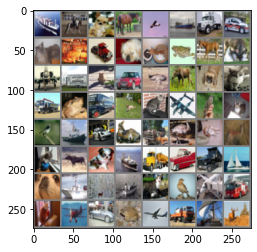

 ship horse   dog horse


In [3]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(device)

cuda:0


In [6]:
model = Net()
model.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [7]:
writer = SummaryWriter()

dataiter = iter(testloader)
images, labels = dataiter.next()
writer.add_image("Image batch", torchvision.utils.make_grid(images))
writer.add_graph(model, images.to(device))
    
writer.close()

/home/science/projects/packt/venv/lib/python3.8/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [8]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [9]:
writer = SummaryWriter()

model = Net()
model.to(device)   

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

for epoch in range(200):  # loop over the dataset multiple times
    for data in trainloader:
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    writer.add_scalar("Loss", loss.item(), epoch)
    print(f"Epoch: {epoch}, Loss: {loss.item()}")

print('Finished Training')
writer.close()

Epoch: 0, Loss: 2.2961807250976562
Epoch: 1, Loss: 2.0658202171325684
Epoch: 2, Loss: 1.9978699684143066
Epoch: 3, Loss: 1.8381470441818237
Epoch: 4, Loss: 1.4645936489105225
Epoch: 5, Loss: 1.1149638891220093
Epoch: 6, Loss: 1.262919306755066
Epoch: 7, Loss: 1.6563124656677246
Epoch: 8, Loss: 1.368667483329773
Epoch: 9, Loss: 1.683907151222229
Epoch: 10, Loss: 1.4846687316894531
Epoch: 11, Loss: 0.8922331929206848
Epoch: 12, Loss: 0.994314432144165
Epoch: 13, Loss: 1.275458812713623
Epoch: 14, Loss: 1.1010558605194092
Epoch: 15, Loss: 1.3508293628692627
Epoch: 16, Loss: 1.3791710138320923
Epoch: 17, Loss: 0.8909919857978821
Epoch: 18, Loss: 1.1024823188781738
Epoch: 19, Loss: 1.1951371431350708
Epoch: 20, Loss: 0.5996502637863159
Epoch: 21, Loss: 1.2600563764572144
Epoch: 22, Loss: 1.3961775302886963
Epoch: 23, Loss: 0.8561701774597168
Epoch: 24, Loss: 0.5872417092323303
Epoch: 25, Loss: 1.464450716972351
Epoch: 26, Loss: 0.6240341663360596
Epoch: 27, Loss: 0.7608842849731445
Epoch: 2

In [11]:
PATH = './cifar_net.pth'
torch.save(model.state_dict(), PATH)

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [14]:
nb_sclasses = 10

confusion_matrix = torch.zeros(nb_sclasses, nb_sclasses)
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        _, predict = torch.max(outputs, 1)
        for t, p in zip(labels.view(-1), predict.view(-1)):
            confusion_matrix[t.long(), p.long()] += 1

cm = confusion_matrix.numpy()
cm = cm / cm.sum(axis=1)

import seaborn as sns

fig = plt.figure(figsize=(10, 7))
heatmap = sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.ylabel('True labels')
plt.xlabel('Predicted labels')

writer = SummaryWriter()
writer.add_figure('Confusion matrix', fig)
writer.close()

In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH))

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))